In [175]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')

# Clean data
df = df[(df['value'] >= df['value'].quantile(0.025)) & 
        (df['value'] <= df['value'].quantile(0.975))]


def draw_line_plot():
    fig, ax = plt.subplots(figsize=(17, 6))
    ax.plot(df.index, df['value'], color='red')
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    
    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month_name()
    label_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    df_bar = df_bar.groupby(['year', 'month'], as_index=True)['value'].mean().unstack()[label_order]
    fig = df_bar.plot.bar(figsize=(10, 7), legend=True).figure
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.title('Average Daily Page Views per Month')
    plt.legend(title='Months')
    
    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box['month_num'] = df_box.index.month
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    df_box = df_box.sort_values('month_num')

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
    axes[0] = sns.boxplot(x=df_box['year'], y=df_box['value'], ax=axes[0])
    axes[1] = sns.boxplot(x=df_box['month'], y=df_box['value'], ax=axes[1])

    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Views')

    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Views')

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig


In [176]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [19]:

df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


Text(0, 0.5, 'Page Views')

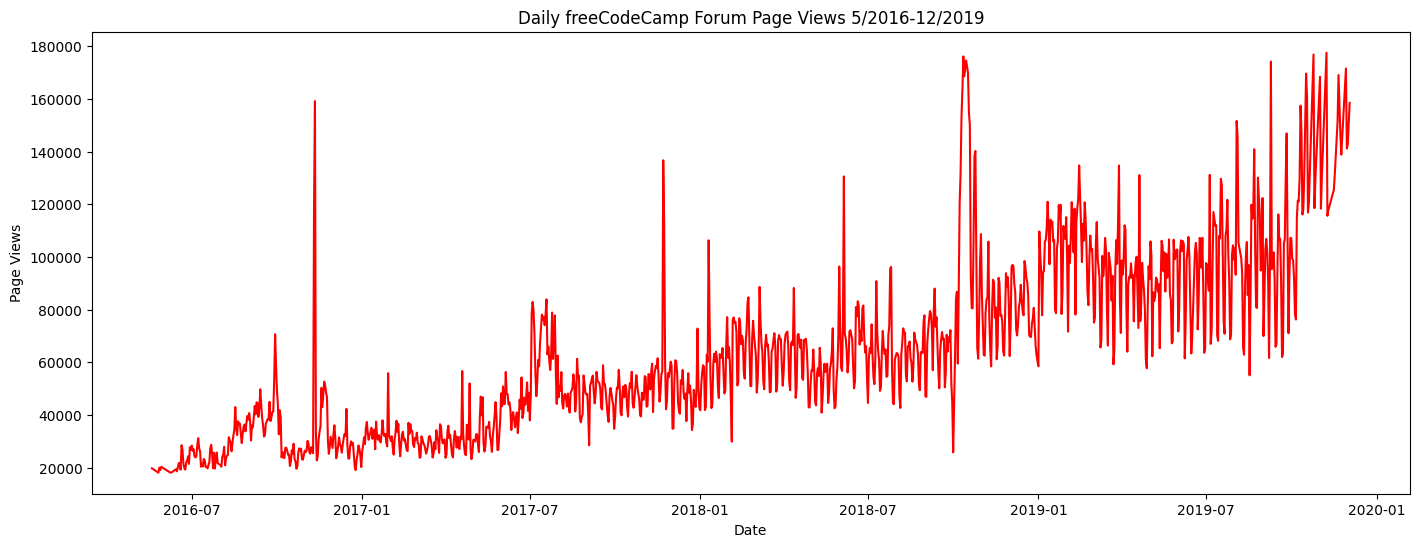

In [54]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')
df = df[(df['value'] >= df['value'].quantile(0.025)) & 
        (df['value'] <= df['value'].quantile(0.975))]

fig, ax = plt.subplots(figsize=(17, 6))
ax.plot(df.index, df['value'], color='red')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')

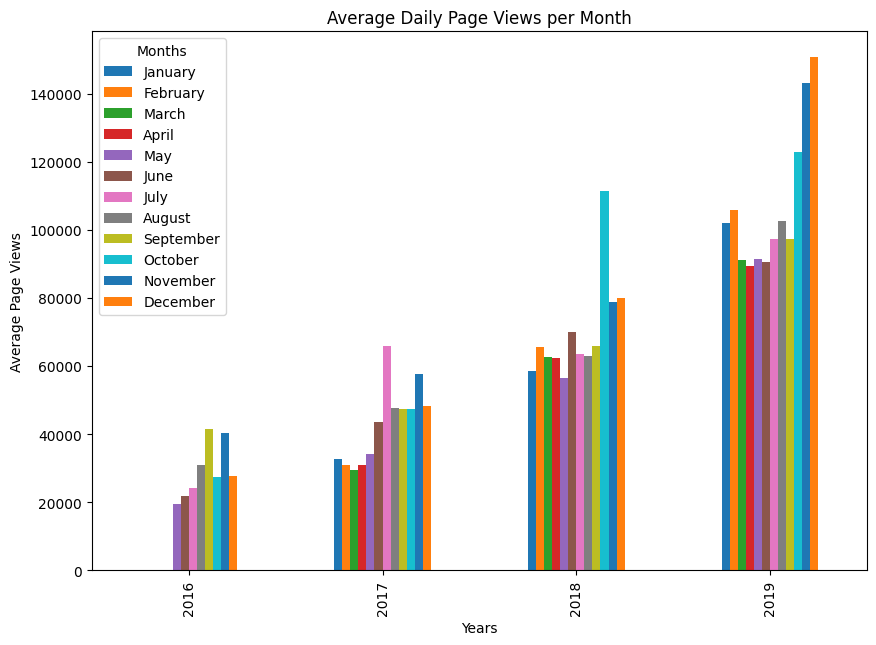

In [125]:
df_bar = df
df_bar['year'] = df_bar.index.year
df_bar['month'] = df_bar.index.month_name()
label_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_bar = df_bar.groupby(['year', 'month'], as_index=True)['value'].mean().unstack()[label_order]
fig = df_bar.plot.bar(figsize=(10, 7), legend=True).figure
plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.title('Average Daily Page Views per Month')
plt.legend(title='Months')

In [150]:
df_box = df.copy()
df_box['month_num'] = df_box.index.month
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

df_box

,date,value,year,month,month_num
0,2016-05-19,19736,2016,May,5
1,2016-05-26,18060,2016,May,5
2,2016-05-27,19997,2016,May,5
3,2016-05-28,19044,2016,May,5
4,2016-05-29,20325,2016,May,5
...,...,...,...,...,...
1233,2019-11-24,138875,2019,Nov,11
1234,2019-11-29,171584,2019,Nov,11
1235,2019-11-30,141161,2019,Nov,11
1236,2019-12-01,142918,2019,Dec,12


ValueError: Could not interpret value `year` for `hue`. Value is a string, but `data` was not passed.

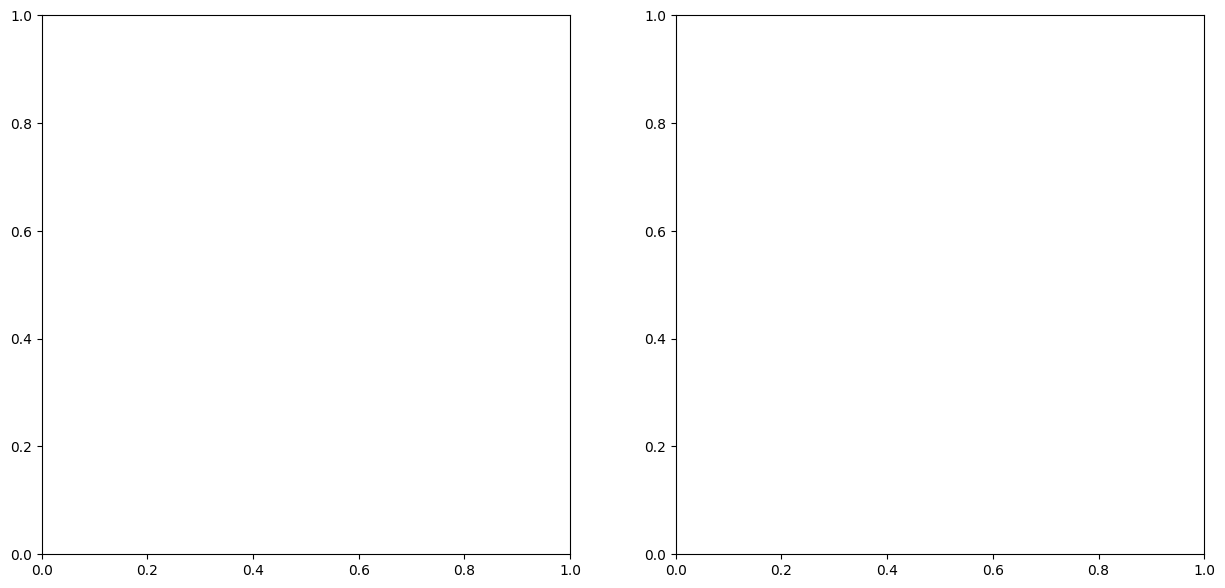

In [164]:
df_box = df.copy()
df_box['month_num'] = df_box.index.month
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box = df_box.sort_values('month_num')

palette_year = sns.color_palette("Set2", n_colors=len(df_box['year'].unique()))
palette_month = sns.color_palette("Set3", n_colors=len(df_box['month'].unique()))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
axes[0] = sns.boxplot(x=df_box['year'], y=df_box['value'], ax=axes[0])
axes[1] = sns.boxplot(x=df_box['month'], y=df_box['value'], ax=axes[1])

axes[0].set_title('Year-wise Box Plot (Trend)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Views')

axes[1].set_title('Month-wise Box Plot (Seasonality)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Views')